# Financial and Risk Analytics course - Vodafone Big Data Lab

## Course Project "Portfolio Selection Strategies"

### Your Name and e-mail

#### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np
import math
# %matplotlib inline

In [ ]:
try:
    import pandas_datareader as web
except:
    !pip install pandas_datareader
    import pandas_datareader as web

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

#### Load data

In [ ]:
tickers = ['MSFT', 'F', 'JPM', 'GOOG', 'HPQ', 'C', 'HOG', 'VZ', 'AAPL', 'IBM', 'T', 'CSCO', 'BAC', 'INTC', 'AMD', 'SNE', 'NVDA', 'AMZN', 'MS', 'BK']

In [ ]:
try:
    df2019_2020 = pd.read_csv('ts2019_2020.csv')
    df2019_2020['Date'] = pd.to_datetime(df2019_2020['Date'])
except:
    df1 = web.DataReader(tickers, data_source='yahoo', start='2018-11-01', end='2020-12-31')
    df1.index = df1.index.strftime('%m/%d/%Y')
    df1['Adj Close'].to_csv('ts2019_2020.csv')
    df2019_2020 = pd.read_csv('ts2019_2020.csv')

In [55]:
try:
    df2008_2009 = pd.read_csv('ts2008_2009.csv')
    df2008_2009['Date'] = pd.to_datetime(df2008_2009['Date'])
except:
    df2 = web.DataReader(tickers, data_source='yahoo', start='2007-11-01', end='2009-12-31')
    df2.index = df2.index.strftime('%m/%d/%Y')
    df2['Adj Close'].to_csv('ts2008_2009.csv')
    df2008_2009 = pd.read_csv('ts2008_2009.csv')

,Date,MSFT,F,JPM,GOOG,HPQ,C,HOG,VZ,AAPL,IBM,T,CSCO,BAC,INTC,AMD,SNE,NVDA,AMZN,MS,BK
0,2007-11-01,27.600462,5.761930,31.646189,350.292023,17.382328,320.179382,36.006718,22.010269,5.774829,77.250008,19.256851,24.065229,36.282211,17.683825,12.80,48.667263,32.528820,87.650002,48.936287,35.582355
1,2007-11-02,27.600462,6.066974,30.810760,354.296997,17.686096,313.694183,36.014000,21.833160,5.788078,77.888939,19.237812,24.312008,35.805969,17.884020,13.17,49.103390,33.779228,85.980003,46.176662,35.741379
2,2007-11-05,27.354702,5.877169,30.539434,361.470123,17.733349,298.479279,35.285851,21.557669,5.736011,77.080063,19.056953,24.738283,35.282101,17.986551,13.42,48.211319,33.779228,84.370003,43.581692,35.907967
3,2007-11-06,27.116386,5.850056,31.496248,369.509979,18.026995,291.661713,35.460602,21.518314,5.908848,76.923729,19.056953,25.486111,36.163162,18.422142,13.43,48.419468,34.845741,87.269997,42.734985,36.559193
4,2007-11-07,26.453550,5.585683,30.160978,365.101501,17.497089,277.776947,35.038296,21.203455,5.739707,75.770920,18.400148,24.491489,34.377224,18.026756,13.01,47.507576,33.190800,87.040001,40.132156,34.658531
5,2007-11-08,25.872644,5.748373,30.425184,345.624512,16.855789,273.536713,35.824684,21.021433,5.406046,72.380737,18.723799,22.158253,34.528034,17.376719,12.51,46.853394,31.112925,83.580002,42.084267,34.832710
6,2007-11-09,25.120451,5.558568,30.210972,330.745270,16.332634,275.199493,35.067406,21.041109,5.094876,68.383476,18.657160,21.373026,34.909031,16.854015,12.37,46.585773,30.671610,78.889999,42.491951,33.954304
7,2007-11-12,24.859781,5.334870,30.268097,314.854858,16.045750,279.107208,35.125656,21.055864,4.737184,69.202019,18.395382,21.769381,34.909031,17.001446,11.95,46.298328,27.609972,77.000000,42.154827,34.961430
8,2007-11-13,25.748964,5.422993,32.167416,329.041656,16.707285,298.479279,36.312534,21.439602,5.236290,71.807755,18.966528,22.539644,36.726700,17.517452,12.40,48.488850,30.046415,79.860001,43.793365,35.809521
9,2007-11-14,25.352942,5.409436,32.238842,319.641907,16.562155,299.643188,35.438763,21.410080,5.117673,70.559479,18.723799,22.218077,36.298084,17.323107,12.28,48.221233,29.577513,78.510002,43.597363,35.506626


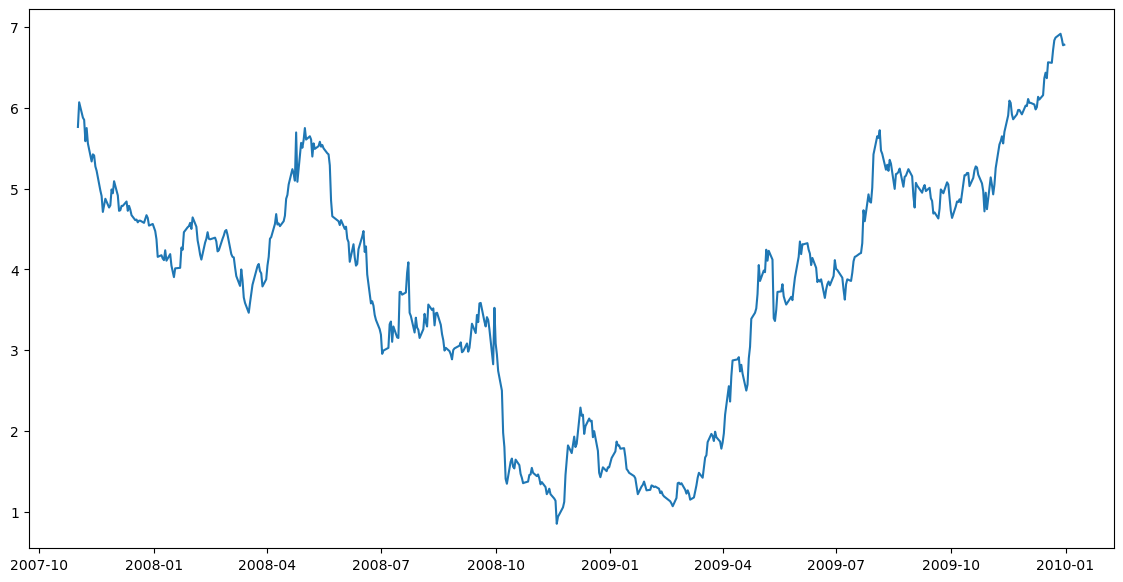

In [62]:
plt.figure(figsize=(14, 7))
X = df2008_2009['Date']
Y = df2008_2009['F']
plt.plot(X, Y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


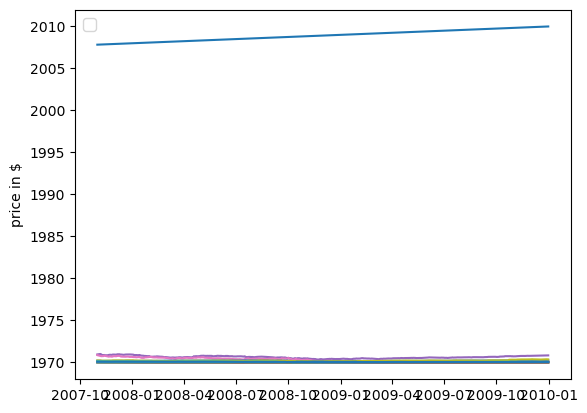

In [59]:
# https://colab.research.google.com/drive/1ulDSw7DEJH1SYRVwvtJXYU0naFgaaBiR#scrollTo=dc2w0ug83tHU

for c in list(df2008_2009.columns.values):
    plt.plot(X, df2008_2009[c])
    
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')
plt.show()

#### Portfolio selection strategies

In [13]:
# Complete the following functions
def strat_buy_and_hold(x_init, cash_init, mu, Q, cur_prices):
   x_optimal = x_init
   cash_optimal = cash_init
   return x_optimal, cash_optimal

def strat_equally_weighted(x_init, cash_init, mu, Q, cur_prices):

    return x_optimal, cash_optimal

def strat_min_variance(x_init, cash_init, mu, Q, cur_prices):

   return x_optimal, cash_optimal

def strat_max_Sharpe(x_init, cash_init, mu, Q, cur_prices):

   return x_optimal, cash_optimal

def strat_your_strategy(x_init, cash_init, mu, Q, cur_prices):

   return x_optimal, cash_optimal

#### Executing strategies

In [14]:
# Input file
input_file_prices = 'ts2019_2020.csv'

# Read data into a dataframe
df = pd.read_csv(input_file_prices)

# Convert dates into array [year month day]
def convert_date_to_array(datestr):
    temp = [int(x) for x in datestr.split('/')]
    return [temp[-1], temp[0], temp[1]]

dates_array = np.array(list(df['Date'].apply(convert_date_to_array)))
data_prices = df.iloc[:, 1:].to_numpy()
dates = np.array(df['Date'])
# Find the number of trading days in Nov-Dec 2018 and
# compute expected return and covariance matrix for period 1
day_ind_start0 = 0
day_ind_end0 = len(np.where(dates_array[:,0]==2018)[0])
cur_returns0 = data_prices[day_ind_start0+1:day_ind_end0,:] / data_prices[day_ind_start0:day_ind_end0-1,:] - 1
mu = np.mean(cur_returns0, axis = 0)
Q = np.cov(cur_returns0.T)

# Remove datapoints for year 2018
data_prices = data_prices[day_ind_end0:,:]
dates_array = dates_array[day_ind_end0:,:]
dates = dates[day_ind_end0:]

# Initial positions in the portfolio
init_positions = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1045, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20000])

# Initial value of the portfolio
init_value = np.dot(data_prices[0,:], init_positions)
print('\nInitial portfolio value = $ {}\n'.format(round(init_value, 2)))

# Initial portfolio weights
w_init = (data_prices[0,:] * init_positions) / init_value

# Number of periods, assets, trading days
N_periods = 6*len(np.unique(dates_array[:,0])) # 6 periods per year
N = len(df.columns)-1
N_days = len(dates)

# Annual risk-free rate for years 2019-2020 is 2.5%
r_rf = 0.025
# Annual risk-free rate for years 2008-2009 is 4.5%
r_rf2008_2009 = 0.045

# Number of strategies
strategy_functions = ['strat_buy_and_hold', 'strat_equally_weighted', 'strat_min_variance', 'strat_max_Sharpe', 'strat_your_strategy']
strategy_names     = ['Buy and Hold', 'Equally Weighted Portfolio', 'Mininum Variance Portfolio', 'Maximum Sharpe Ratio Portfolio', 'Your Own Strategy']
N_strat = 1  # comment this in your code
#N_strat = len(strategy_functions)  # uncomment this in your code
fh_array = [strat_buy_and_hold, strat_equally_weighted, strat_min_variance, strat_max_Sharpe]

portf_value = [0] * N_strat
x = np.zeros((N_strat, N_periods),  dtype=np.ndarray)
cash = np.zeros((N_strat, N_periods),  dtype=np.ndarray)
for period in range(1, N_periods+1):
   # Compute current year and month, first and last day of the period
   if dates_array[0, 0] == 19:
       cur_year  = 19 + math.floor(period/7)
   else:
       cur_year  = 2019 + math.floor(period/7)

   cur_month = 2*((period-1)%6) + 1
   day_ind_start = min([i for i, val in enumerate((dates_array[:,0] == cur_year) & (dates_array[:,1] == cur_month)) if val])
   day_ind_end = max([i for i, val in enumerate((dates_array[:,0] == cur_year) & (dates_array[:,1] == cur_month+1)) if val])
   print('\nPeriod {0}: start date {1}, end date {2}'.format(period, dates[day_ind_start], dates[day_ind_end]))
   
   # Prices for the current day
   cur_prices = data_prices[day_ind_start,:]

   # Execute portfolio selection strategies
   for strategy  in range(N_strat):

      # Get current portfolio positions
      if period == 1:
         curr_positions = init_positions
         curr_cash = 0
         portf_value[strategy] = np.zeros((N_days, 1))
      else:
         curr_positions = x[strategy, period-2]
         curr_cash = cash[strategy, period-2]

      # Compute strategy
      x[strategy, period-1], cash[strategy, period-1] = fh_array[strategy](curr_positions, curr_cash, mu, Q, cur_prices)

      # Verify that strategy is feasible (you have enough budget to re-balance portfolio)
      # Check that cash account is >= 0
      # Check that we can buy new portfolio subject to transaction costs

      ###################### Insert your code here ############################

      # Compute portfolio value
      p_values = np.dot(data_prices[day_ind_start:day_ind_end+1,:], x[strategy, period-1]) + cash[strategy, period-1]
      portf_value[strategy][day_ind_start:day_ind_end+1] = np.reshape(p_values, (p_values.size,1))
      print('  Strategy "{0}", value begin = $ {1:.2f}, value end = $ {2:.2f}'.format( strategy_names[strategy], 
             portf_value[strategy][day_ind_start][0], portf_value[strategy][day_ind_end][0]))

      
      # Compute expected returns and covariances for the next period
      cur_returns = data_prices[day_ind_start+1:day_ind_end+1,:] / data_prices[day_ind_start:day_ind_end,:] - 1
      mu = np.mean(cur_returns, axis = 0)
      Q = np.cov(cur_returns.T)



Initial portfolio value = $ 1000020.59


Period 1: start date 01/02/2019, end date 02/28/2019
  Strategy "Buy and Hold", value begin = $ 1000020.59, value end = $ 1121819.46

Period 2: start date 03/01/2019, end date 04/30/2019
  Strategy "Buy and Hold", value begin = $ 1126804.25, value end = $ 1076135.55

Period 3: start date 05/01/2019, end date 06/28/2019
  Strategy "Buy and Hold", value begin = $ 1072051.98, value end = $ 970949.98

Period 4: start date 07/01/2019, end date 08/30/2019
  Strategy "Buy and Hold", value begin = $ 978938.32, value end = $ 935830.96

Period 5: start date 09/03/2019, end date 10/31/2019
  Strategy "Buy and Hold", value begin = $ 924311.15, value end = $ 1029603.73

Period 6: start date 11/01/2019, end date 12/31/2019
  Strategy "Buy and Hold", value begin = $ 1039248.86, value end = $ 1100256.47

Period 7: start date 01/02/2020, end date 02/28/2020
  Strategy "Buy and Hold", value begin = $ 1112964.31, value end = $ 902404.30

Period 8: start date 03/0

In [9]:
# Plot results
###################### Insert your code here ############################